In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Define constants

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Prepare data

Download data and save it

In [3]:
url = 'https://drive.google.com/file/d/1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5/view?usp=sharing'

In [4]:
!gdown --id 1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5

Downloading...
From: https://drive.google.com/uc?id=1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5
To: /content/MM17-WeiboRumorSet.zip
1.35GB [00:08, 159MB/s]


Unzip and save into folder train_extracted

In [5]:
import zipfile
with zipfile.ZipFile("MM17-WeiboRumorSet.zip","r") as zip_ref:
    zip_ref.extractall("./train_extracted")

Exract labels from image names and save image names with corresponding labels in dataframe

In [6]:
filenames1 = os.listdir("./train_extracted/MM17-WeiboRumorSet/rumor_images")
filenames01 = []
categories1 = []
for filename in filenames1:
    category = 1 # rumor
    categories1.append(1)
    s = "rumor_images/"+str(filename)
    filenames01.append(s)

df1 = pd.DataFrame({
    'filename': filenames01,
    'category': categories1
})

In [7]:
df1.head()

,filename,category
0,rumor_images/6252dd6djw1dwdqox8cbnj.jpg,1
1,rumor_images/0062nYaXjw1ev5vncdpdgj30cm081aap.jpg,1
2,rumor_images/684e58a1jw1elgnmqkk3uj20bw0ctab1.jpg,1
3,rumor_images/91452c91gw1el9tx6en51j20dc0hsaa7.jpg,1
4,rumor_images/005uETZ3jw1ev1zlli30yj30cj0m8dhy.jpg,1


In [8]:
len(df1) # number of rumor images

7954

In [9]:
filenames2 = os.listdir("./train_extracted/MM17-WeiboRumorSet/nonrumor_images")
filenames02 = []
categories2 = []
for filename in filenames2:
    category2 = 0 # rumor
    categories2.append(0)
    s = "nonrumor_images/"+str(filename)
    filenames02.append(s)

df2 = pd.DataFrame({
    'filename': filenames02,
    'category': categories2
})

In [10]:
df2.head()

,filename,category
0,nonrumor_images/6e953603gw1ewiw77mziij20c80hld...,0
1,nonrumor_images/470bf257jw1ezsdtvra80j209b0aya...,0
2,nonrumor_images/593bbc68gw1eyb1l28q8dj20c808ot...,0
3,nonrumor_images/005EHRy1jw1evhagmzqegj30g4096q...,0
4,nonrumor_images/6693ce84gw1eyzggajs7oj20c80idd...,0


In [11]:
len(df2) # number of non rumor images

5318

In [12]:
df = df1.append(df2, ignore_index=True).reset_index(drop = True)

In [13]:
df.head()

,filename,category
0,rumor_images/6252dd6djw1dwdqox8cbnj.jpg,1
1,rumor_images/0062nYaXjw1ev5vncdpdgj30cm081aap.jpg,1
2,rumor_images/684e58a1jw1elgnmqkk3uj20bw0ctab1.jpg,1
3,rumor_images/91452c91gw1el9tx6en51j20dc0hsaa7.jpg,1
4,rumor_images/005uETZ3jw1ev1zlli30yj30cj0m8dhy.jpg,1


In [14]:
len(df) # combined

13272

In [15]:
df.describe()

,category
count,13272.000000
mean,0.599307
std,0.490057
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
df.tail()

,filename,category
13267,nonrumor_images/470bf257jw1ezsdtwrn6qj20850c9w...,0
13268,nonrumor_images/593793e5gw1eybcndg9ngj20f70jpw...,0
13269,nonrumor_images/624c6377gw1ez0inyuluaj20c80c8w...,0
13270,nonrumor_images/644471aegw1exlhgjc0pxj20bu0hsm...,0
13271,nonrumor_images/593793e5gw1eymlygajemj218g0rwk...,0


Total count

In [17]:
label_counts = df.groupby('category').size()
print(label_counts)

category
0    5318
1    7954
dtype: int64


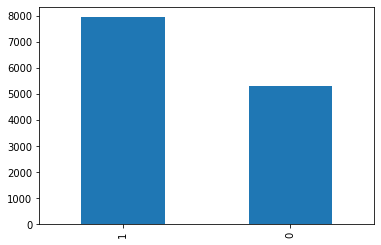

In [18]:
df['category'].value_counts().plot.bar()

Sample image

Shuffle df

In [19]:
# shuffle the DataFrame rows 
df = df.sample(frac = 1).reset_index(drop=True) 

In [20]:
df.head()

,filename,category
0,rumor_images/928559b3jw1eoba4vu0hjj208b064dfy.jpg,1
1,nonrumor_images/6a5ce645jw1ez9e6gqsfqj20xc0m8j...,0
2,rumor_images/539086f7jw1e4yfc789axj20i00dit93.jpg,1
3,rumor_images/0062YFN8gw1exg3gf74dsj30p018gwk6.jpg,1
4,rumor_images/597d6827jw1ev0taswxc8j20c808s74w.jpg,1


In [21]:
df.tail()

,filename,category
13267,nonrumor_images/470bf257jw1ey0aqi94k7j20fa0a7q...,0
13268,rumor_images/61ff32degw1ev0m03ld1fj20c808574p.jpg,1
13269,rumor_images/92b80bd0gw1e9eu2eh5rbj20bu0byjs5.jpg,1
13270,rumor_images/6425cc7egw1ekkz663x1nj20qe0hswg8.jpg,1
13271,rumor_images/61c99730jw1evjosojhz0j20c805s0tv.jpg,1


Make a combined list with rumor and non rumor image paths last part

In [22]:
filenames = []
categories = []
for i in range(0, len(df)):
  filenames.append(str(df['filename'][i]))
  categories.append((df['category'][i]))
print(len(filenames))
print(len(categories))

13272
13272


In [23]:
print(filenames[0])
print(categories[0])
print(filenames[-1])
print(categories[-1])

rumor_images/928559b3jw1eoba4vu0hjj208b064dfy.jpg
1
rumor_images/61c99730jw1evjosojhz0j20c805s0tv.jpg
1


rumor_images/96d41661jw1e8efhy9derj20k00i279g.jpg


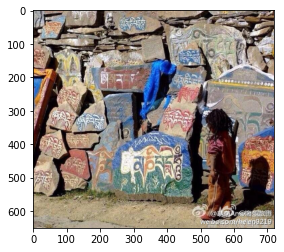

In [24]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

rumor_images/68e16161jw1e4hr0mk1hlj20c00jidhr.jpg


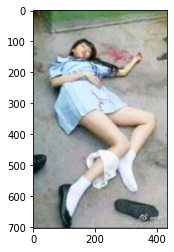

In [25]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

nonrumor_images/593793e5gw1ezivyr3igsj20p00goacu.jpg


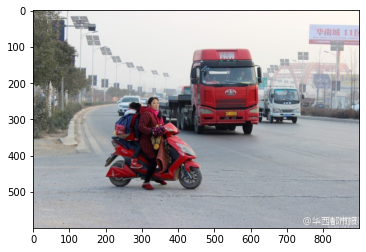

In [26]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

rumor_images/8cace1d1jw1ell50uwbd1j20g2086dgt.jpg


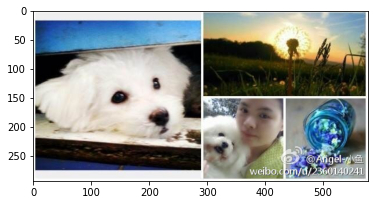

In [27]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

In [28]:
df["category"] = df["category"].replace({0: 'nonrumor', 1: 'rumor'}) 

In [29]:
df.head()

,filename,category
0,rumor_images/928559b3jw1eoba4vu0hjj208b064dfy.jpg,rumor
1,nonrumor_images/6a5ce645jw1ez9e6gqsfqj20xc0m8j...,nonrumor
2,rumor_images/539086f7jw1e4yfc789axj20i00dit93.jpg,rumor
3,rumor_images/0062YFN8gw1exg3gf74dsj30p018gwk6.jpg,rumor
4,rumor_images/597d6827jw1ev0taswxc8j20c808s74w.jpg,rumor


**Divide into 50% train and 50% test, Note that we have shuffled earlier**

In [30]:
mid = int(len(df)/2)
df_train = df[:mid].reset_index(drop=True)
df_test = df[mid:].reset_index(drop=True)
print(len(df_train))
print(len(df_test))

6636
6636


In [31]:
train_df, validate_df = train_test_split(df_train, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

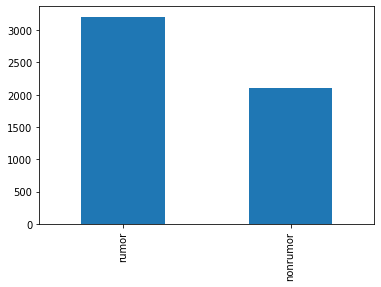

In [32]:
train_df['category'].value_counts().plot.bar()

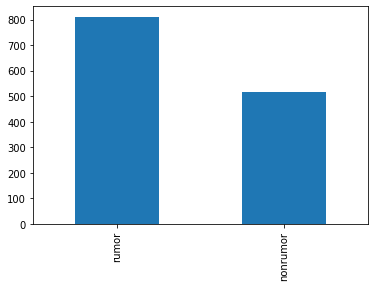

In [33]:
validate_df['category'].value_counts().plot.bar()

**Pytorch**

In [34]:
import matplotlib.pyplot as plt
from collections import OrderedDict
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [35]:
#download the pretrained model
import torchvision.models as models
model = models.resnet18(pretrained = True)
model

#switch device to gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [36]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image
import torchvision

In [40]:
class Rumor_NonRumor_Dataset(Dataset):
    def __init__(self, file_list, dir, mode='train', transform = None):
        self.file_list = file_list
        self.dir = dir
        self.mode= mode
        self.transform = transform
        if self.mode == 'train':
            if 'nonrumor' in self.file_list[0]:
                self.label = 0
            else:
                self.label = 1
            
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx]))
        if self.transform:
            img = self.transform(img)
        if self.mode == 'train':
            img = img.numpy()
            return img.astype('float32'), self.label
        else:
            img = img.numpy()
            return img.astype('float32'), self.file_list[idx]
        
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])


nonrumor_files = [tf for tf in df_train['filename'] if 'nonrumor' in tf]
rumor_files = [tf for tf in df_train['filename'] if 'nonrumor' not in tf]
train_dir = "./train_extracted/MM17-WeiboRumorSet"

nonrumors = Rumor_NonRumor_Dataset(nonrumor_files, train_dir, transform = data_transform)
rumors = Rumor_NonRumor_Dataset(rumor_files, train_dir, transform = data_transform)

nonrumor_rumor = ConcatDataset([nonrumors, rumors])

print(len(nonrumor_rumor))
print(float(len(nonrumor_rumor))/32)
print((int(len(nonrumor_rumor)/32))*32)

6636
207.375
6624


In [41]:
nonrumor_rumor

In [42]:
dataloader = DataLoader(nonrumor_rumor, batch_size = 32, shuffle=True, num_workers=2)

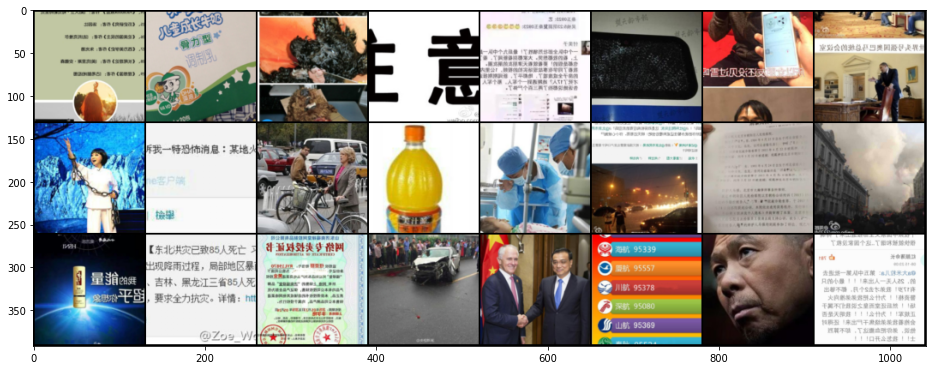

In [43]:
samples, labels = iter(dataloader).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

Training only classifier

In [44]:
# Freeze the parameters 
for param in model.parameters():
    param.requires_grad = False 

In [45]:
#Classifier architecture to put on top of resnet18
fc = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(512,100)),
    ('relu', nn.ReLU()),
    ('fc2', nn.Linear(100,2)),
    ('output', nn.LogSoftmax(dim=1))
]))

model.fc = fc

In [46]:
#shifting model to gpu
model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [47]:
#function to train the model
def train(model, trainloader, criterion, optimizer, epochs = 5):
    train_loss =[]
    for e in range(epochs):
        running_loss =0
        for images, labels in trainloader:
            inputs, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            img = model(inputs)
            
            loss = criterion(img, labels)
            running_loss+=loss
            loss.backward()
            optimizer.step()
        print("Epoch : {}/{}..".format(e+1,epochs),
         "Training Loss: {:.6f}".format(running_loss/len(trainloader))) 
        train_loss.append(running_loss)
    plt.plot(train_loss,label="Training Loss")
    plt.show() 
    
    
    
epochs = 3
model.train()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
criterion = nn.NLLLoss()    
train(model,dataloader,criterion, optimizer, epochs)  

RuntimeError: ignored

Test set

In [48]:
#Save the model
filename_pth = 'resnet18_rumor_nonrumor.pth'
torch.save(model.state_dict(), filename_pth)


#Transform the test dataset
test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])
test_dir = train_dir
test_df = df_test
test_files = [tf for tf in test_df['filename']]
testset = Rumor_NonRumor_Dataset(test_files, test_dir, mode='test', transform = test_transform)
testloader = DataLoader(testset, batch_size = 64, shuffle=False, num_workers=4)

In [49]:
model.eval()
fn_list = []
pred_list = []
for x, fn in testloader:
    with torch.no_grad():
        x = x.to(device)
        output = model(x)
        pred = torch.argmax(output, dim=1)
        fn_list += [n[:-4] for n in fn]
        pred_list += [p.item() for p in pred]

results = pd.DataFrame({"id":fn_list, "label":pred_list})
results.to_csv('preds_resnet18.csv', index=False)

RuntimeError: ignored

In [ ]:
print(pred_list)

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
test_df['category_predicted'] = np.argmax(predict, axis=-1)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['category_predicted'] = test_df['category_predicted'].replace({ 'rumor': 1, 'nonrumor': 0 })
test_df['category'] = test_df['category'].replace({ 'rumor': 1, 'nonrumor': 0 })

Virtaulize Result

In [ ]:
test_df['category_predicted'].value_counts().plot.bar()

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
y_pred = test_df['category_predicted']
y_true = test_df['category']

In [ ]:
from sklearn.metrics import accuracy_score # normal accuracy
from sklearn.metrics import balanced_accuracy_score # used in case of imbalanced data sets, average of recall, from 0 to 1
from sklearn.metrics import confusion_matrix # division of performance on the multilabels
from sklearn.metrics import cohen_kappa_score # compares model against random prediction, from -1 to 1
from sklearn.metrics import classification_report # for multilabel classification, gives precision, recall, f score, support, more
target_names = ['class 0', 'class 1']

def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Balanced Accuracy:" , balanced_accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Cohen Kappa Score:", cohen_kappa_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))
    
print('CNN Only')
print_metrics(y_true, y_pred)

See predicted result with images

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    category_predicted = row['category_predicted']
    img = load_img("./train_extracted/MM17-WeiboRumorSet/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename[int(3*len(filename)/4):] + '(' + "{}".format(category) + ')' + '(' + "{}".format(category_predicted) + ')' )
plt.tight_layout()
plt.show()

In [51]:
from google.colab import files
# saving the dataframe of our results
test_df.to_csv('test_df_5331.csv') 
files.download('test_df_5331.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>